In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import joblib

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('train.csv')
print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Seperate dataset into train and test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), # Predictive variables
    data['SalePrice'], # Target variable
    test_size=0.1, # Portion of dataset to allocate to test set
    random_state=0 # SETTING THE SEED HERE
)

print(X_train.shape, X_test.shape)

(1314, 79) (146, 79)


# Feature Engineering

# Target

In [5]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [6]:
y_train

930     12.211060
656     11.887931
45      12.675764
1348    12.278393
55      12.103486
          ...    
763     12.727838
835     11.759786
1216    11.626254
559     12.363076
684     12.305918
Name: SalePrice, Length: 1314, dtype: float64

# Missing Values

## Categorical Data

In [7]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# Given in data_description.txt
categorical_features = categorical_features + ['MSSubClass']


# Casting all the variables as categorical
X_train[categorical_features] = X_train[categorical_features].astype('O')
X_test[categorical_features] = X_test[categorical_features].astype('O')

print("The number of categorical features are: {}".format(len(categorical_features)))

The number of categorical features are: 44


In [8]:
categorical_features_with_na = [feature for feature in categorical_features if X_train[feature].isnull().sum() > 0]

X_train[categorical_features_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
BsmtExposure    0.025114
BsmtFinType2    0.025114
BsmtQual        0.024353
BsmtCond        0.024353
BsmtFinType1    0.024353
MasVnrType      0.004566
Electrical      0.000761
dtype: float64

In [10]:
# EDITED
X_train = X_train.drop(['PoolQC', 'MiscFeature', 'Alley'], axis = 1)
X_test = X_test.drop(['PoolQC', 'MiscFeature', 'Alley'], axis = 1)

In [12]:
# EDITED
for feature in ['PoolQC', 'MiscFeature', 'Alley']:
    categorical_features_with_na.remove(feature)

### Features with large missing data are replaced by the word "Missing"

In [13]:
with_string_missing = [feature for feature in categorical_features_with_na if X_train[feature].isnull().mean() > 0.1]
print(with_string_missing)

['FireplaceQu', 'Fence']


### Features to impute with the most frequent category

In [14]:
with_frequent_category = [feature for feature in categorical_features_with_na if X_train[feature].isnull().mean() < 0.1]
print(with_frequent_category)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [15]:
# For Large missing data features

X_train[with_string_missing] = X_train[with_string_missing].fillna('Missing')
X_test[with_string_missing] = X_test[with_string_missing].fillna('Missing')

In [16]:
# Most frequent category

for feature in with_frequent_category:
    mode = X_train[feature].mode()[0]
    
    print(feature, mode)
    
    X_train[feature].fillna(mode, inplace=True)
    X_test[feature].fillna(mode, inplace=True)

MasVnrType None
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


### Checking if there are any missing values are there in the dataset.

In [17]:
X_train[categorical_features_with_na].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
Fence           0
dtype: int64

In [18]:
[feature for feature in categorical_features_with_na if X_test[feature].isnull().sum() > 0]

[]

## Numerical Data

* **To engineer missing values in numerical features, we will:**
* **add a binary missing indicator feature and then replace the missing values in the original feature with the mean.**


In [19]:
numerical_features = [feature for feature in X_train.columns if feature not in categorical_features and feature != 'SalePrice']

print('Total number of numerical features: {}'.format(len(numerical_features)))

Total number of numerical features: 35


In [20]:
numerical_features_with_na = [feature for feature in numerical_features if X_train[feature].isnull().sum() > 0]

print("Total number of numerical features with missing values: {}".format(len(numerical_features_with_na)))

Total number of numerical features with missing values: 3


In [21]:
X_train[numerical_features_with_na].isnull().mean()

LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

### Replacing missing values in two steps as mentioned above:


In [22]:
for feature in numerical_features_with_na:
    
    mean_value = X_train[feature].mean()
    
    print(feature, mean_value)
    
    # Adding binary missing indicator (in train and test)
    X_train[feature + '_na'] = np.where(X_train[feature].isnull(), 1, 0)
    X_test[feature + '_na'] = np.where(X_test[feature].isnull(), 1, 0)
    
    # Replacing missing values by the mean in train and test
    X_train[feature].fillna(mean_value, inplace=True)
    X_test[feature].fillna(mean_value, inplace=True)
    


LotFrontage 69.87974098057354
MasVnrArea 103.7974006116208
GarageYrBlt 1978.2959677419356


In [23]:
X_train[numerical_features_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [24]:
[feature for feature in numerical_features_with_na if X_test[feature].isnull().sum() > 0]

[]

In [25]:
X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,0,0,0
656,0,0,0
45,0,0,0
1348,1,0,0
55,0,0,0


## Temporal Features

In [26]:
def elapsed_years(df, feature):
    df[feature] = df['YrSold'] - df[feature]
    
    return df

In [27]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, feature)
    X_test = elapsed_years(X_test, feature)

In [28]:
X_train.drop(['YrSold'], axis=1, inplace=True)
X_test.drop(['YrSold'], axis=1, inplace=True)

# Numerical Variable Transformations

## Logarithmic Transformation

* **This transformation is applied to only postive values and non zeros in order to get a more Gaussian like distribution.**

In [29]:
for feature in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
    X_train[feature] = np.log(X_train[feature])
    X_test[feature] = np.log(X_test[feature])

In [30]:
X_train[['LotFrontage', '1stFlrSF', 'GrLivArea']].isnull().sum()

LotFrontage    0
1stFlrSF       0
GrLivArea      0
dtype: int64

In [31]:
X_test[['LotFrontage', '1stFlrSF', 'GrLivArea']].isnull().sum()

LotFrontage    0
1stFlrSF       0
GrLivArea      0
dtype: int64

## Yeo-Johnson Transformation

* **The yeo-johnson transformation learns the best exponent to transform the variable it needs to learn it from the train set.**
* **And then apply the transformation to the test set with same parameter. This time we will pass "param" as an argument to the test set.**

In [32]:
X_train['LotArea'], param = stats.yeojohnson(X_train['LotArea'])

# we are passing the parameter that we got in train set to the test set.
X_test['LotArea'] = stats.yeojohnson(X_test['LotArea'], lmbda=param)

print(param)

-12.55283001172003


C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1558: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\USER\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:2782: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\USER\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:2321: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\USER\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:2322: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [33]:
# check absence of na in the train set
[feature for feature in X_train.columns if X_train[feature].isnull().sum() > 0]

[]

In [34]:
# check absence of na in the test set
[feature for feature in X_train.columns if X_test[feature].isnull().sum() > 0]

[]

## Binarize Extremely skewed features

* **These features are very skewed, we would transform those into binary features.**

In [35]:
skewed = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

for feature in skewed:
    X_train[feature] = np.where(X_train[feature]==0, 0, 1)
    X_test[feature] = np.where(X_test[feature]==0, 0, 1)


# Categorical Features

In [36]:
quality_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

quality_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for feature in quality_features:
    X_train[feature] = X_train[feature].map(quality_mappings)
    X_test[feature] = X_test[feature].map(quality_mappings)

In [37]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

feature = 'BsmtExposure'

X_train[feature] = X_train[feature].map(exposure_mappings)
X_test[feature] = X_test[feature].map(exposure_mappings)

In [38]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_features = ['BsmtFinType1', 'BsmtFinType2']

for feature in finish_features:
    X_train[feature] = X_train[feature].map(finish_mappings)
    X_test[feature] = X_test[feature].map(finish_mappings)

In [39]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

feature = 'GarageFinish'

X_train[feature] = X_train[feature].map(garage_mappings)
X_test[feature] = X_test[feature].map(garage_mappings)

In [40]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

feature = 'Fence'

X_train[feature] = X_train[feature].map(fence_mappings)
X_test[feature] = X_test[feature].map(fence_mappings)

In [41]:
[feature for feature in X_train.columns if X_train[feature].isnull().sum() > 0]

[]

# Removing Rare Variables

* **For the remaining categorical variables, we will gorup those categories that are present in less than 1% of the observations.**
* **That is, all values of categorical variables that are shared by less than 1% of houses, well be replaced by the string "Rare".**

In [42]:
# capture all quality variables
quality_features  = quality_features + finish_features + ['BsmtExposure', 'GarageFinish', 'Fence']

# capture the remaining categorical variables (those that we did not re-map)

remaining_categorical_variables = [feature for feature in categorical_features if feature not in quality_features]

len(remaining_categorical_variables)

30

In [48]:
def find_frequent_labels(df, feature, rare_percentage):
    df = df.copy()
    
    temp_data = df.groupby(feature)[feature].count() / len(df)
    
    return temp_data[temp_data > rare_percentage].index # we are returning non rare features.

# EDITED
remaining_categorical_variables.remove('Alley')
remaining_categorical_variables.remove('PoolQC')
remaining_categorical_variables.remove('MiscFeature')

for feature in remaining_categorical_variables:
    frequent_list = find_frequent_labels(X_train, feature, 0.01)
    
    print(feature, frequent_list)
    print()
    
    # Replace rare categories by the string "Rare"
    # We are checking the value is in freqent list or not, if it is in list we will keep the value else replace with 'Rare'
    X_train[feature] = np.where(X_train[feature].isin(frequent_list), X_train[feature], 'Rare')
    X_test[feature] = np.where(X_test[feature].isin(frequent_list), X_test[feature], 'Rare')
    

MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'Rare', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn', 'Rare'], dtype='object', name='Condition1')

Condition2 Index(['Norm'], dtype='object', name='Condition2

# Encoding Categorical variables 

## We will do it so that we capture the monotonic relationship between labels and the target

* **We need to transfrom categories features into numbers.**
* **We will do it so that we capture the monotonic relationship between labels and the target.**

In [49]:
"""
This function will assgin discrete values to the strings of the variables, so that the smaller values
corresponds to the category that shows the smaller mean house price.
"""

def replace_categories(train, test, y_train, feature, target):
    temp_data = pd.concat([X_train, y_train], axis=1)
    
    # Order the categories in a feature from that with the lowest house sale price, to that with the highest
    ordered_labels = temp_data.groupby([feature])[target].mean().sort_values().index
    
    # Creating a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    
    print(feature, ordinal_label)
    print()
    
    # Use the dictionary to replace the categorical strings by integers
    train[feature] = train[feature].map(ordinal_label)
    test[feature] = test[feature].map(ordinal_label)
    
    

In [50]:
for feature in remaining_categorical_variables:
    replace_categories(X_train, X_test, y_train, feature, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

LotShape {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Rare': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}

HouseStyle {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story': 5}

RoofStyle {'Gable': 0, 'Rare': 1, 'Hip

In [51]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,9,3,4.290459,0.079663,1,1,3,1,0,0,19,2,1,3,3,8,5,2,2,0,0,10,10,1,0.0,4,3,4,4,3,3,6,16,1,0,1450,1466,2,5,1,3,7.290293,0,0,7.290293,0,0,2,0,3,1,4,7,4,0,0,3,2.0,3,3,610,3,3,2,100,18,0,0,0,0,0,0,7,2,3,0,0,0
656,9,3,4.276666,0.079663,1,1,1,1,0,0,8,2,1,3,3,5,7,49,2,0,0,6,6,2,54.0,4,3,2,3,3,1,5,806,1,0,247,1053,2,5,1,3,6.959399,0,0,6.959399,1,0,1,1,3,1,4,5,4,0,0,3,49.0,2,1,312,3,3,2,0,0,0,0,0,0,3,0,8,2,3,0,0,0
45,11,3,4.110874,0.079663,1,0,1,1,0,0,21,2,1,4,3,9,5,5,5,2,0,3,2,2,412.0,5,3,4,5,3,1,6,456,1,0,1296,1752,2,5,1,3,7.468513,0,0,7.468513,1,0,2,0,2,1,5,6,4,1,4,3,5.0,2,2,576,3,3,2,196,82,0,0,0,0,0,0,2,2,3,0,0,0
1348,9,3,4.246776,0.079663,1,2,2,1,0,0,10,2,1,3,3,7,5,9,9,0,0,10,10,1,0.0,4,3,4,4,3,4,6,1443,1,0,39,1482,2,5,1,3,7.309212,0,0,7.309212,1,0,2,0,3,1,4,5,4,1,2,3,9.0,2,2,514,3,3,2,402,25,0,0,0,0,0,0,8,2,3,1,0,0
55,9,3,4.605170,0.079663,1,1,1,1,0,0,8,2,1,3,3,6,5,44,44,0,0,6,7,2,272.0,3,3,2,3,3,1,4,490,1,0,935,1425,2,4,1,3,7.261927,0,0,7.261927,0,0,2,0,3,1,3,7,4,1,4,3,44.0,2,2,576,3,3,2,0,0,0,1,0,0,0,0,7,2,3,0,0,0


## Checking for any missing data is there or not.

In [52]:
[feature for feature in X_train.columns if X_train[feature].isnull().sum() > 0]

[]

In [53]:
[feature for feature in X_test.columns if X_test[feature].isnull().sum() > 0]

[]

## Monotonic relationship between labels and features

* **The higher the value of the label (i.e., 0, 1, 2, 3....), the higher the value of Sale Price is called monotonic relationship.**
* **When ever there is increase in difference, this encoding will capture it.**

In [54]:
y_train

930     12.211060
656     11.887931
45      12.675764
1348    12.278393
55      12.103486
          ...    
763     12.727838
835     11.759786
1216    11.626254
559     12.363076
684     12.305918
Name: SalePrice, Length: 1314, dtype: float64

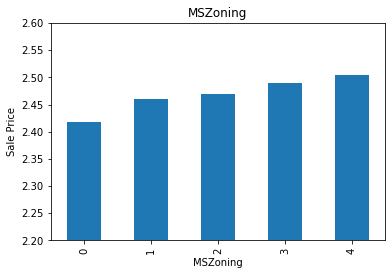

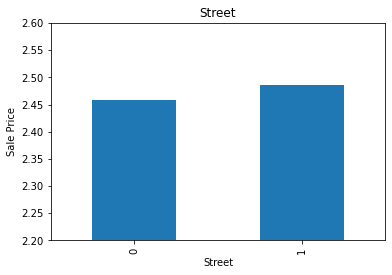

KeyError: 'Alley'

In [55]:
def analyse_vars(train, y_train, feature):
    
    # Function plots median house sale price per encoded category
    temp_data = pd.concat([X_train, np.log(y_train)], axis=1)
    
    temp_data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.ylim(2.2, 2.6)
    plt.ylabel('Sale Price')
    plt.show()

for feature in categorical_features:
    analyse_vars(X_train, y_train, feature)

# Feature Scaling

In [56]:
scaler = MinMaxScaler()

# Fit the scaler to the training set.
scaler.fit(X_train)

# Transform the train and test set.

# returns numpy array , so we wrap the array with pandas Dataframe.
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)




In [57]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.750000,0.75,0.461171,0.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.002835,0.0,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.018692,1.0,0.75,0.430183,0.5,0.5,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.00,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.456066,0.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,0.5,0.5,0.333333,0.666667,0.000000,0.8,0.142807,0.0,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.75,0.457944,0.5,0.25,0.220028,0.5,0.5,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.75,0.0,0.636364,0.666667,0.75,0.0,0.0,0.0
2,0.916667,0.75,0.394699,0.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,0.5,1.0,1.000000,0.666667,0.000000,1.0,0.080794,0.0,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.75,0.046729,0.5,0.50,0.406206,0.5,0.5,1.0,0.228705,0.149909,0.0,0.0,0.0,0.0,0.00,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
3,0.750000,0.75,0.445002,0.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.333333,0.00000,0.666667,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255670,0.0,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.75,0.084112,0.5,0.50,0.362482,0.5,0.5,1.0,0.469078,0.045704,0.0,0.0,0.0,0.0,0.00,0.0,0.636364,0.666667,0.75,1.0,0.0,0.0
4,0.750000,0.75,0.577658,0.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.6,0.086818,0.0,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.75,0.411215,0.5,0.50,0.406206,0.5,0.5,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.00,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


# Saving the train and test data for next steps.

In [58]:
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)


# Saving the scaler, scaler = MinMaxScaler()

In [59]:
joblib.dump(scaler, 'minmax_scalar.joblib')

['minmax_scalar.joblib']